In [2]:
import numpy as np
from sklearn.datasets import load_svmlight_file
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

In [3]:
# define objective function
def objective_fun(x):
    return np.dot(x, theta[:13].reshape(13, 1))[0][0]
    # return np.dot(x, theta[:13].reshape(13, 1))[0][0] + theta[13]
    
# define loss function
def loss_fun(given_x, given_y):
    loss = 0
    for cur_x, cur_y in zip(given_x, given_y):
        cur_x = cur_x.toarray()
        loss = loss + (objective_fun(cur_x) - cur_y) ** 2
    return loss / 2

In [4]:
# load data set
X, y = load_svmlight_file("F:/trainingdata/housing_scale.txt")
# split data set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)
# parameters initialize - zeros
theta = np.zeros(13)
# define learning rate
alpha = 0.01
# gradient decent
iteration_num = 1000
losses = []
for i in range(iteration_num):
    # print current iteration number
    print("\rProducing (" + str(i) + "/" + str(iteration_num) + ")", end="")

Producing (999/1000)

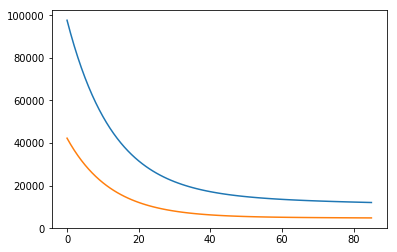

In [90]:
    # calculate gradient
    gradient = np.subtract(np.dot(np.dot(X_train.toarray().T, X_train.toarray()), theta),
                           np.dot(X_train.toarray().T, y_train))

    # using number of samples to divide grandient
    for j in range(len(gradient)):
        gradient[j] = gradient[j] / y_train.size

    # decent the function, and then update parameters
    theta = theta - alpha * gradient

    # calculate the loss
    losses.append((loss_fun(X_train, y_train), loss_fun(X_test, y_test)))  
    # L-train\L-validation

    plt.plot(losses)
    plt.show()

